In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [8]:
from google.colab import files
uploaded=files.upload()

Saving dataset.xlsx to dataset.xlsx


In [9]:
data=pd.read_excel('dataset.xlsx')
print(data.head())

   Unnamed: 0 buying  maint doors persons lug_boot safety  class
0           0  vhigh  vhigh     2       2    small    low  unacc
1           1  vhigh  vhigh     2       2    small    med  unacc
2           2  vhigh  vhigh     2       2    small   high  unacc
3           3  vhigh  vhigh     2       2      med    low  unacc
4           4  vhigh  vhigh     2       2      med    med  unacc


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1728 non-null   int64 
 1   buying      1728 non-null   object
 2   maint       1728 non-null   object
 3   doors       1728 non-null   object
 4   persons     1728 non-null   object
 5   lug_boot    1728 non-null   object
 6   safety      1728 non-null   object
 7   class       1728 non-null   object
dtypes: int64(1), object(7)
memory usage: 108.1+ KB


In [11]:
for i in data.columns:
    print(data[i].unique(),"\t",data[i].nunique())

[   0    1    2 ... 1725 1726 1727] 	 1728
['vhigh' 'high' 'med' 'low'] 	 4
['vhigh' 'high' 'med' 'low'] 	 4
['2' '3' '4' '5more'] 	 4
['2' '4' 'more'] 	 3
['small' 'med' 'big'] 	 3
['low' 'med' 'high'] 	 3
['unacc' 'acc' 'vgood' 'good'] 	 4


In [12]:
for i in data.columns:
    print(data[i].value_counts())

1727    1
1158    1
1136    1
1138    1
1140    1
       ..
583     1
585     1
587     1
589     1
0       1
Name: Unnamed: 0, Length: 1728, dtype: int64
med      432
vhigh    432
low      432
high     432
Name: buying, dtype: int64
med      432
vhigh    432
low      432
high     432
Name: maint, dtype: int64
5more    432
4        432
2        432
3        432
Name: doors, dtype: int64
4       576
more    576
2       576
Name: persons, dtype: int64
med      576
small    576
big      576
Name: lug_boot, dtype: int64
med     576
low     576
high    576
Name: safety, dtype: int64
unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


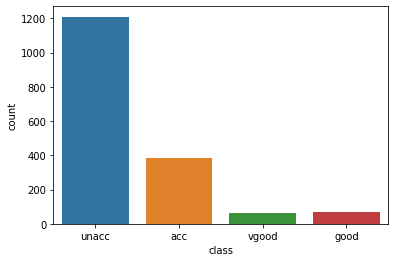

In [13]:
sns.countplot(data['class'])

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
le=LabelEncoder()

In [16]:
for i in data.columns:
    data[i]=le.fit_transform(data[i])

In [17]:
data.head()

,Unnamed: 0,buying,maint,doors,persons,lug_boot,safety,class
0,0,3,3,0,0,2,1,2
1,1,3,3,0,0,2,2,2
2,2,3,3,0,0,2,0,2
3,3,3,3,0,0,1,1,2
4,4,3,3,0,0,1,2,2


 Models

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

dataset train and test split

In [19]:
X=data[data.columns[:-1]]
y=data['class']

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier=classifier.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [22]:
prediction= classifier.predict(X_test)
prediction
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.33      0.27      0.30       118
           1       0.00      0.00      0.00        19
           2       0.77      0.87      0.81       358
           3       0.44      0.29      0.35        24

    accuracy                           0.67       519
   macro avg       0.38      0.36      0.37       519
weighted avg       0.63      0.67      0.65       519



In [23]:
from sklearn.metrics import accuracy_score
print (accuracy_score(y_test,prediction))

0.6724470134874759


# KNN

In [24]:
knn=KNeighborsClassifier(n_jobs=-1)

In [25]:
knn.fit(X_train,y_train)
pred=knn.predict(X_test)
knn.score(X_test,y_test)

0.6608863198458574

In [26]:
knn.fit(X_train,y_train)
pred=knn.predict(X_test)
knn.score(X_test,y_test)

0.6608863198458574

In [27]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.42      0.32      0.37       118
           1       0.20      0.37      0.26        19
           2       0.76      0.83      0.79       358
           3       0.00      0.00      0.00        24

    accuracy                           0.66       519
   macro avg       0.35      0.38      0.35       519
weighted avg       0.63      0.66      0.64       519



## Random Forests

In [28]:
from sklearn.ensemble import RandomForestClassifier

In [29]:
rfc=RandomForestClassifier(n_jobs=-1,random_state=51)

In [30]:
rfc.fit(X_train,y_train)
print(rfc.score(X_test,y_test))

0.9633911368015414
